### Voorbereidende opdracht
1. Meer details modelleren is moeilijk, niet alleen qua code maar ook qua data. Stel dat je wilt modelleren hoe mensen zichzelf verplaatsen, dan heb je daar ook data voor nodig. En de vraag is of je precies wilt voorspellen hoeveel besmettingen er zijn óf dat je de verschillen tussen de scenario's in kaart wil brengen om een risicoinschatting te kunnen maken.
2. Afstand houden, isoleren, lockdown.
3. Aantal besmettingen, duur van een golf, aantal overlijdens, drukte op IC's.

### Opdracht 1. Finite-state machine ICU 

In [8]:
#import benodigde libraries
from IPython.display import Image
from IPython.display import display
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from graphviz import Digraph

In [ ]:
# Functie om diagram te plotten m.b.v. Graphviz
def create_finite_automaton(states, accepting_states, transitions):
    dot = Digraph(format='png')
    states = states
    accepting_states = accepting_states
    transitions = transitions

    # Plot diagram van links naar rechts
    dot.attr(rankdir='LR')

    # Voeg states toe aan diagram
    for state in states:
        if state in accepting_states:
            dot.node(state, shape='doublecircle')  # Terminal states
        else:
            dot.node(state, shape='circle')  # Normal states

    # Voeg transitions toe aan diagram
    for (start, label), end in transitions.items():
        dot.edge(start, end, label=label)

    return dot

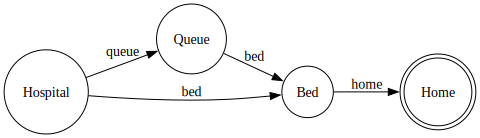

In [17]:
# Uitwerking 1.1

# Definieer stages
states_1_1 = ['Hospital', 'Queue', 'Bed', 'Home']
accepting_states_1_1 = ['Home']  # Terminal states

# Definieer transitions
transitions_1_1 = {
    ('Hospital', 'queue'): 'Queue',
    ('Hospital', 'bed'): 'Bed',
    ('Queue', 'bed'): 'Bed',
    ('Bed', 'home'): 'Home'
}

# Creeer diagram
automaton_1_1 = create_finite_automaton(states_1_1, accepting_states_1_1, transitions_1_1)
display(automaton_1_1)

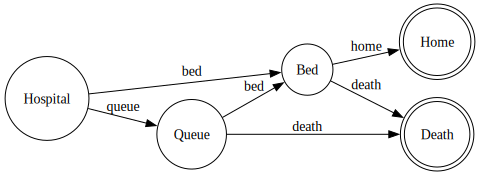

In [16]:
# Uitwerking 1.2.

# Definieer stages
states_1_2 = ['Hospital', 'Queue', 'Bed', 'Home', 'Death']
accepting_states_1_2 = ['Home', 'Death']  # Terminal states

# Definieer transitions
transitions_1_2 = {
    ('Hospital', 'queue'): 'Queue',
    ('Hospital', 'bed'): 'Bed',
    ('Queue', 'bed'): 'Bed',
    ('Queue', 'death'): 'Death',
    ('Bed', 'home'): 'Home',
    ('Bed', 'death'): 'Death'
}

# Creeer diagram
automaton_1_2 = create_finite_automaton(states_1_2, accepting_states_1_2, transitions_1_2)
display(automaton_1_2)

### Opdracht 2. KPI's
KPI's 
- Aantal doden
- Gemiddelde wachttijd van patiënten
- Totale wachttijd van patiënten
- Aantal bedden
- Gemiddelde bezetting van de bedden

Parameters
- Aantal bedden
- Aantal medewerkers
- Instroom patiënten
- Kritische wachttijd

### Opdracht 3. Datasim
- 190 bedden

Wat valt op?
- Bij 165 bedden loopt de queue heel langzaam vol en overlijden steeds meer mensen totdat de instroom op tijdstip 124 stopt. Na een aanloopperiode zijn alle bedden voor 90% in gebruik.
- Bij 190 bedden is er soms een kleine queue maar vallen er geen doden. Alle bedden zijn hier ook bijna constant in gebruik.
- Bij 215 bedden is er geen queue en wordt het maximum aantal bedden niet bereikt.